In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime


# Акции компаний, которые мы будем использовать для этого анализа
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Настройте времена окончания и начала для получения данных.

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

C:\Users\anyak\AppData\Local\Temp\ipykernel_7380\2980436466.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMAZON
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMAZON
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,AMAZON
2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300,AMAZON
2024-02-21,168.940002,170.229996,167.139999,168.589996,168.589996,44575600,AMAZON
2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400,AMAZON
2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59662900,AMAZON
2024-02-26,175.699997,176.369995,174.259995,174.729996,174.729996,44368600,AMAZON
2024-02-27,174.080002,174.619995,172.860001,173.539993,173.539993,31109600,AMAZON


In [2]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,178.992183,180.482778,177.683928,179.195675,178.665193,5.666673e+07
std,12.097332,11.903740,12.019527,11.932064,12.072928,1.614152e+07
min,144.380005,146.710007,143.899994,145.309998,144.538513,1.299739e+07
25%,172.290001,173.805004,170.992500,172.660004,171.996483,4.674302e+07
50%,180.080002,181.854996,178.235001,180.380005,179.791656,5.304980e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.203525e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.282567e+08


In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-02-28 to 2024-02-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


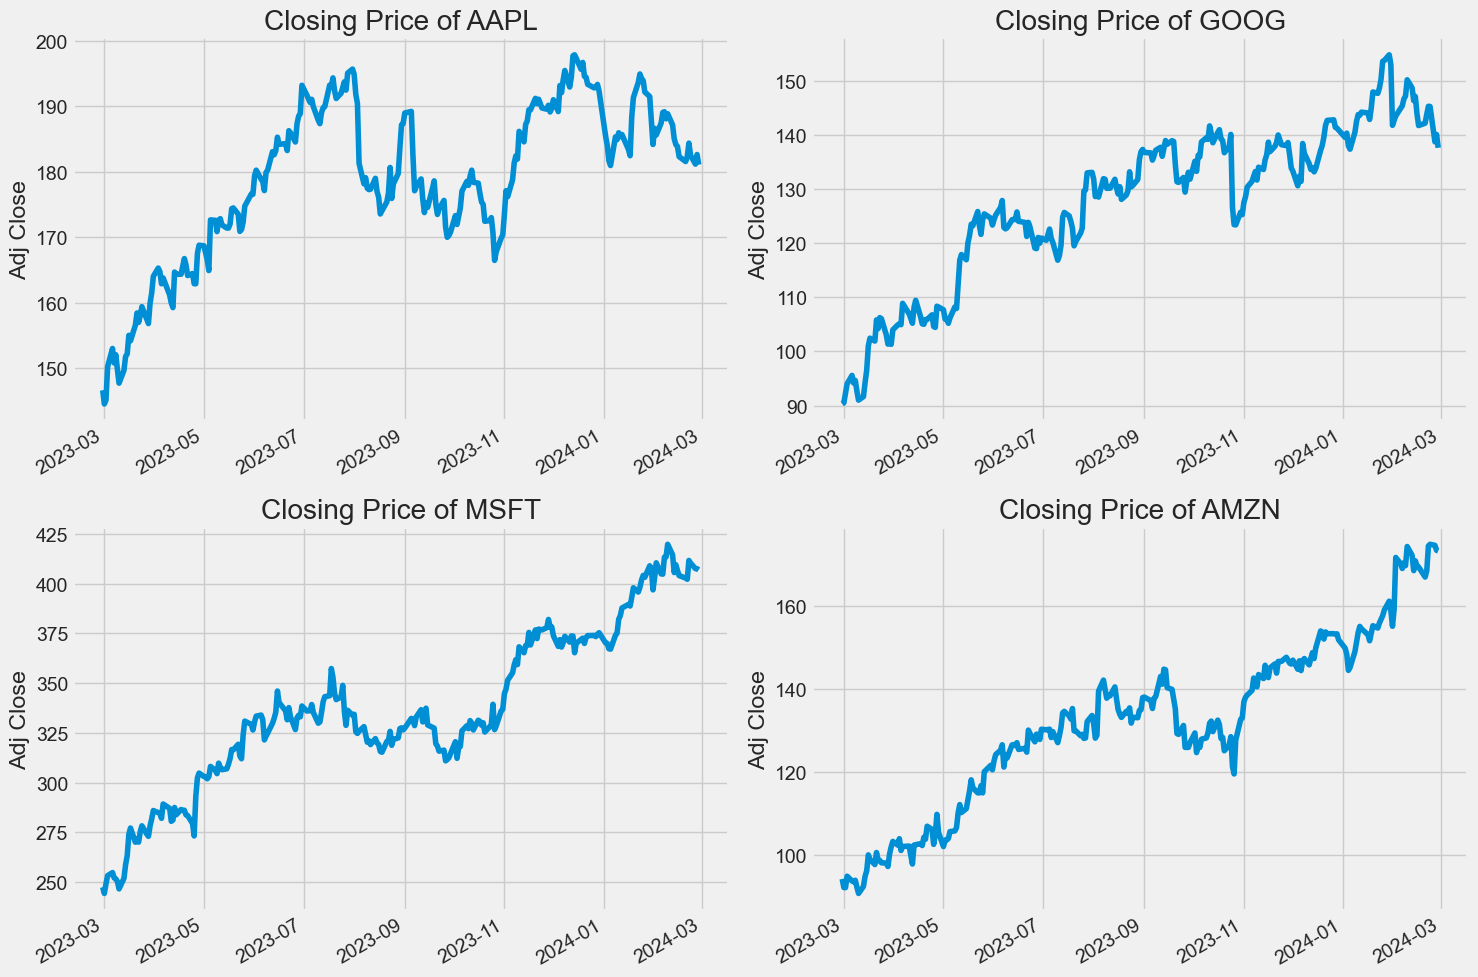

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

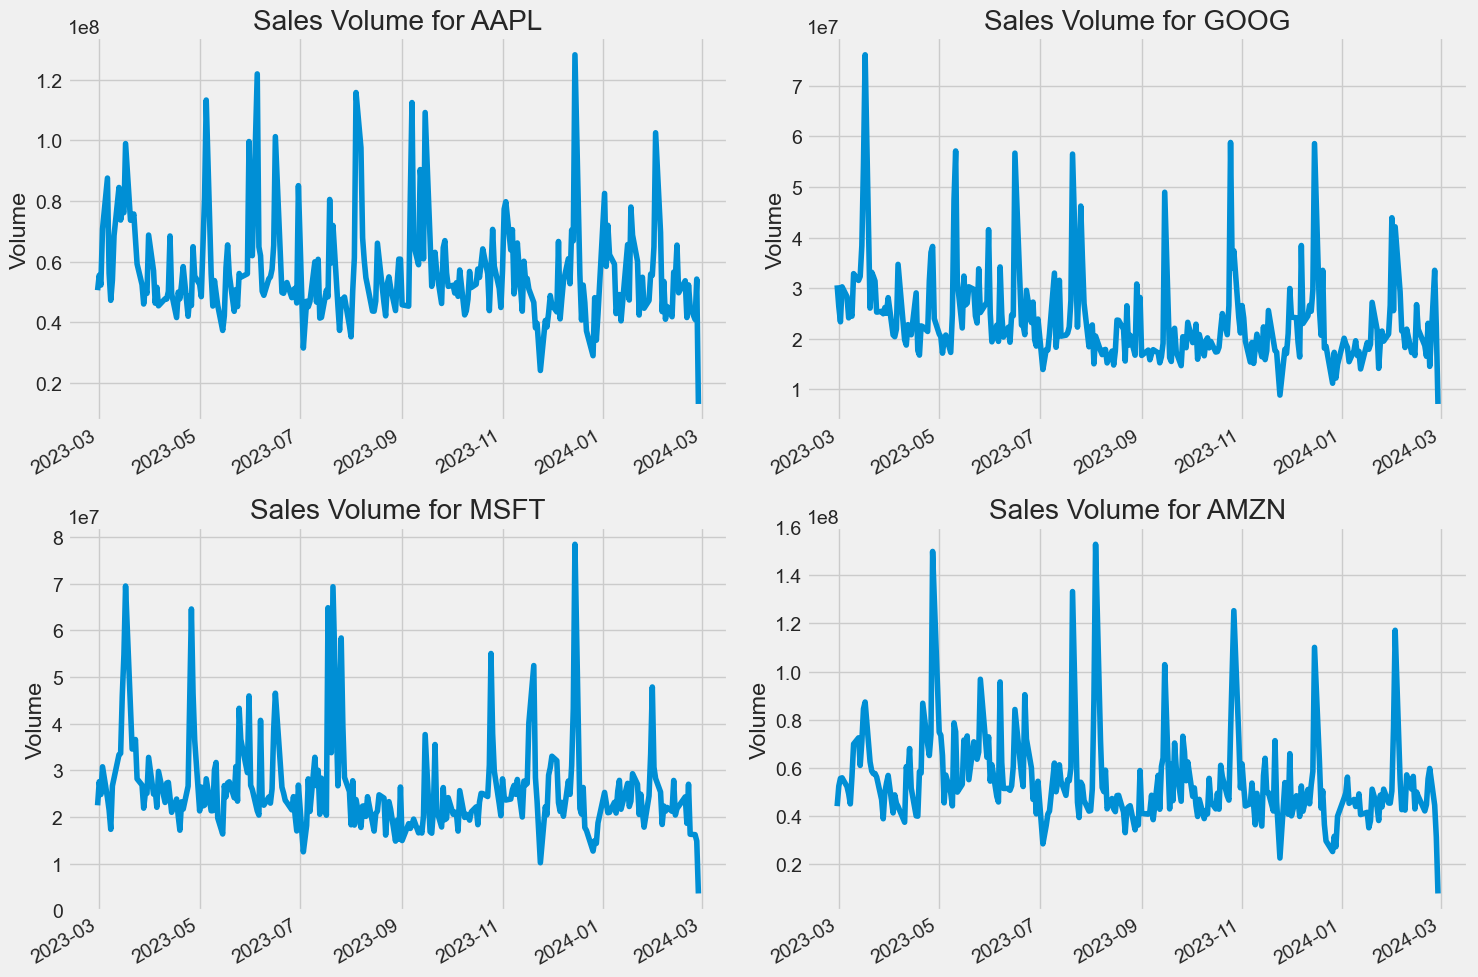

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

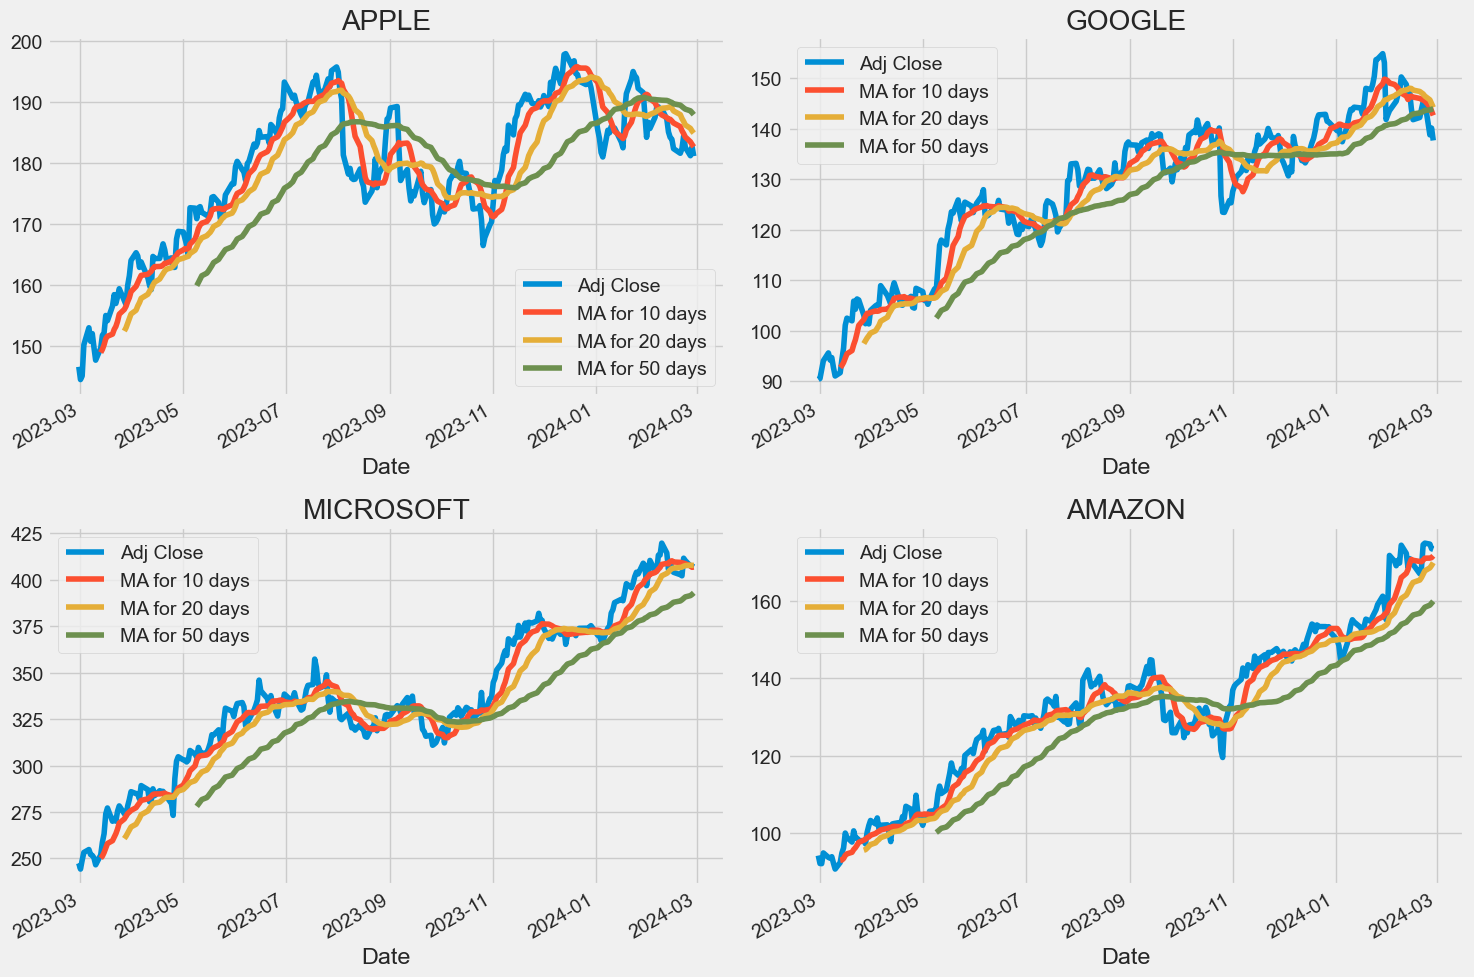

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

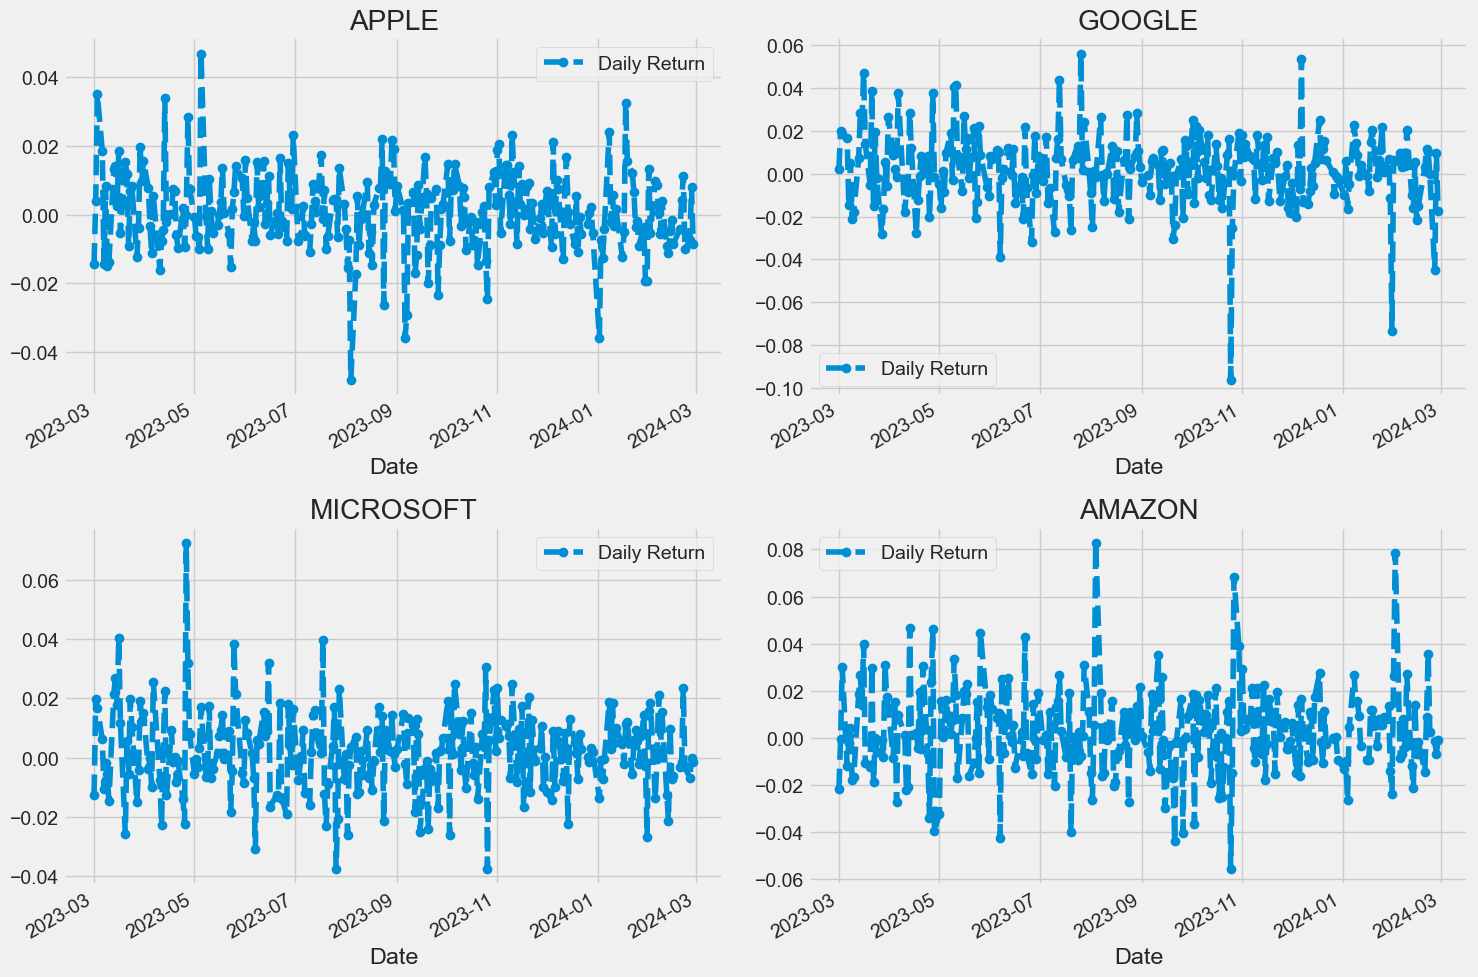

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

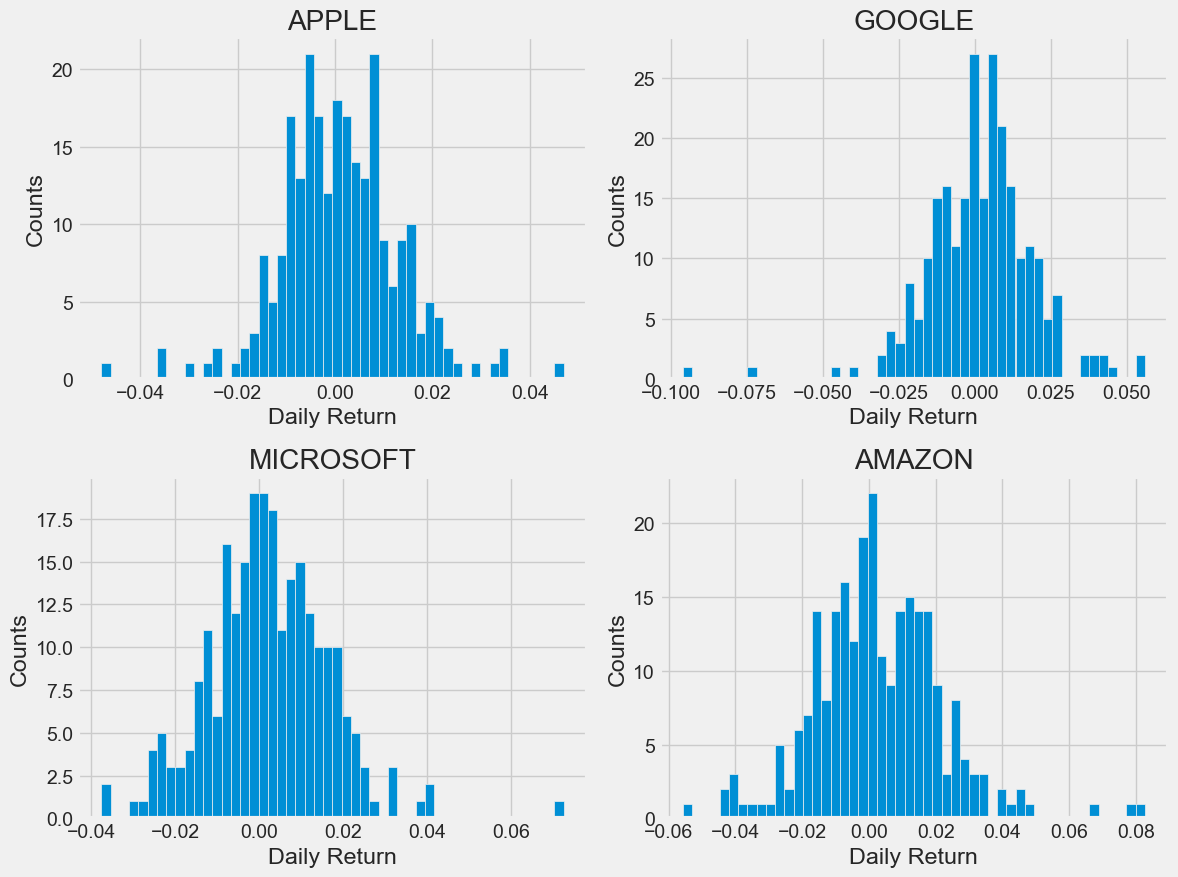

In [8]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [10]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Создание нового DataFrame для изменений в компаниях.
tech_rets = closing_df.pct_change(fill_method=None)
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-28,NaN,NaN,NaN,NaN
2023-03-01,-0.014246,-0.021861,0.002326,-0.012629
2023-03-02,0.004129,-0.000434,0.019887,0.019653
2023-03-03,0.035090,0.030066,0.018525,0.016646
2023-03-06,0.018539,-0.012118,0.016592,0.006189


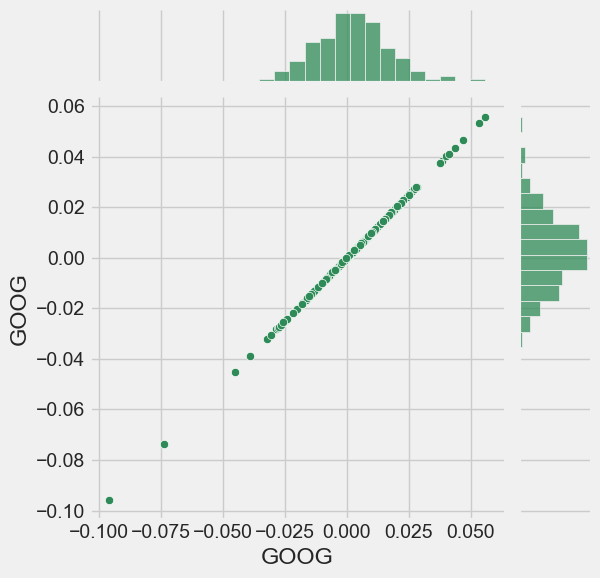

In [11]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

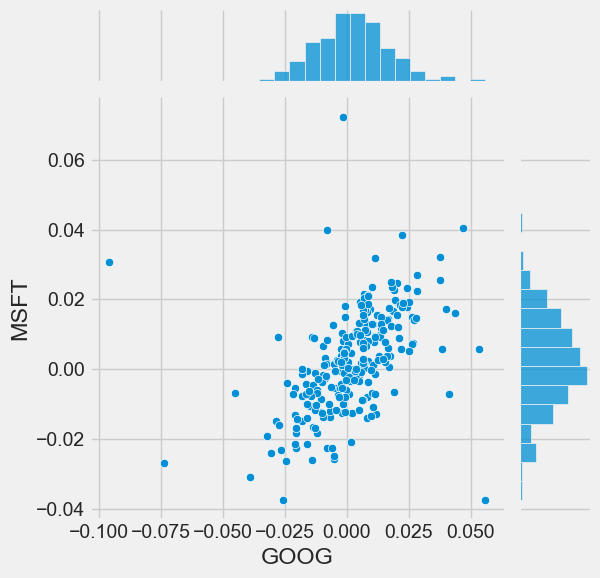

In [12]:
# Мы будем использовать joinplot для сравнения ежедневных изменений Google и Microsoft.
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

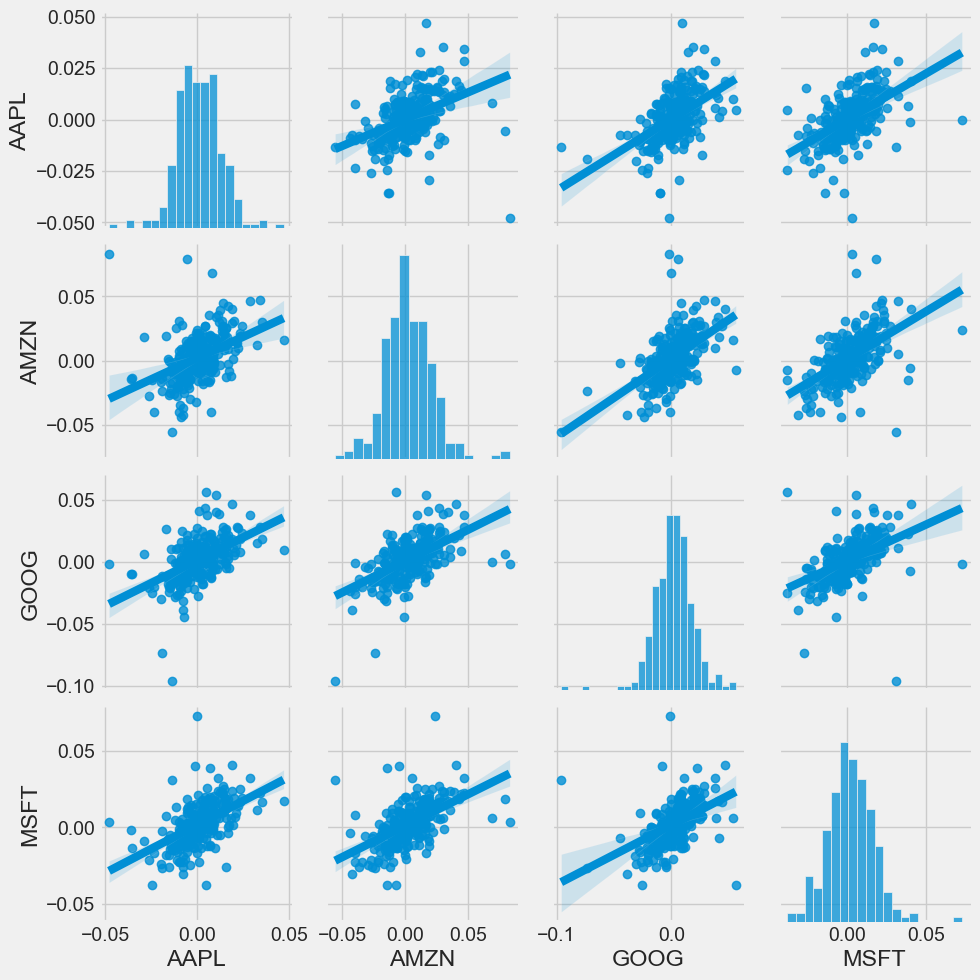

In [13]:
# Визуальный сравнительный анализ

sns.pairplot(tech_rets, kind='reg')

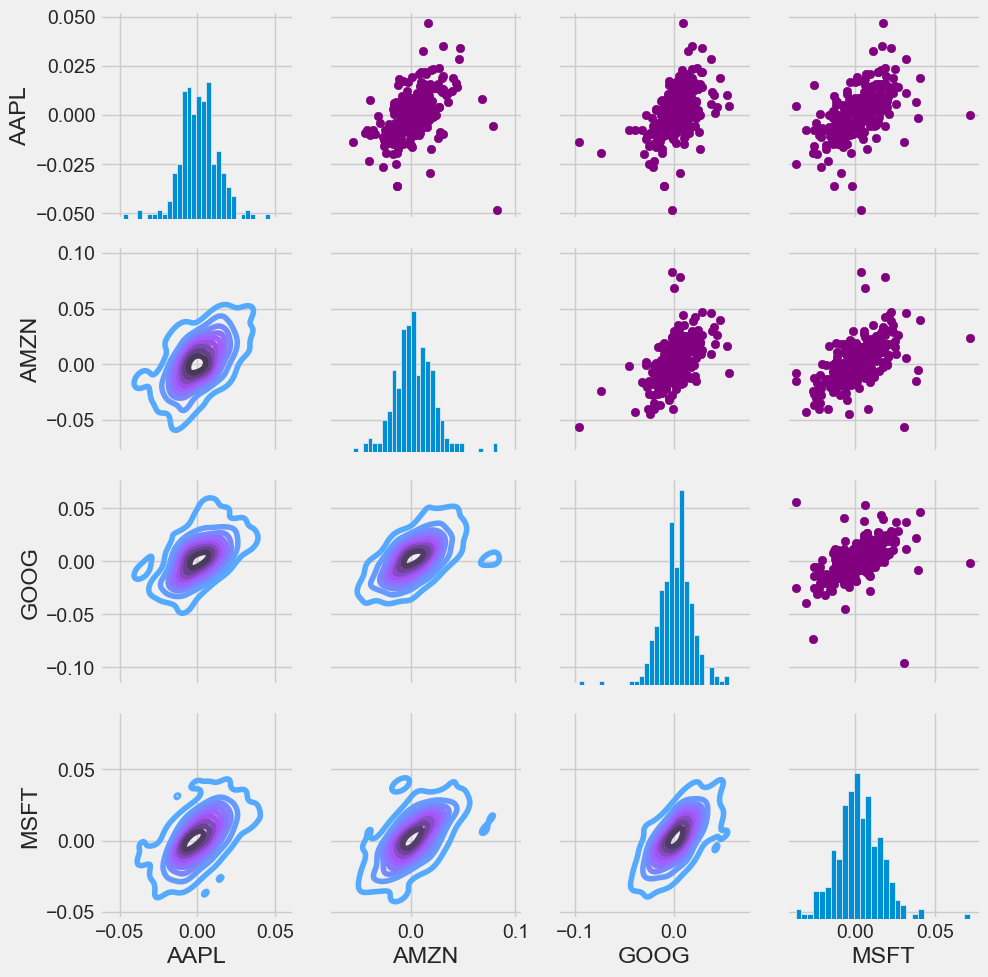

In [14]:
# Установка фигуры под именем returns_fig, вызов PairPlot на DataFrame.
return_fig = sns.PairGrid(tech_rets.dropna())

# Используя map_upper, мы можем указать, как будет выглядеть верхний треугольник.
return_fig.map_upper(plt.scatter, color='purple')

# Мы также можем определить нижний треугольник на фигуре, включая тип графика (kde). 
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

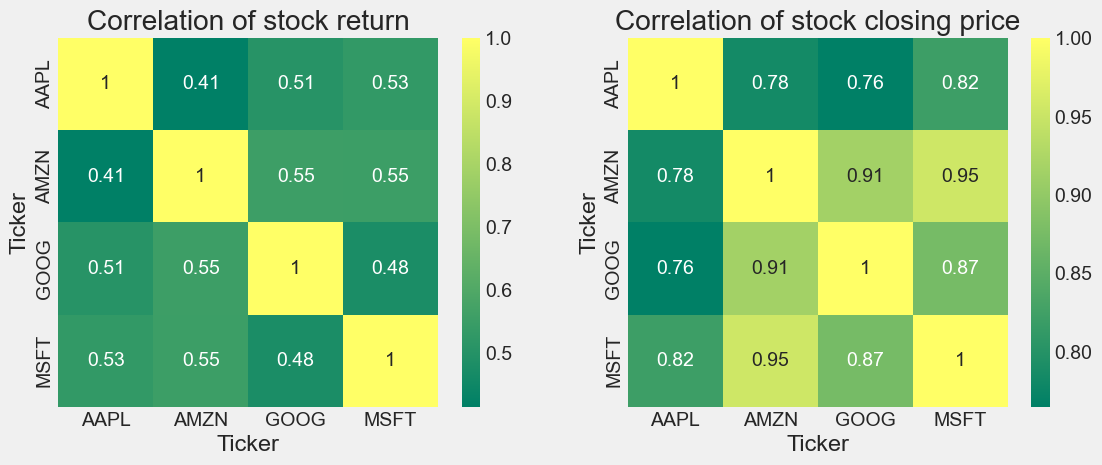

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

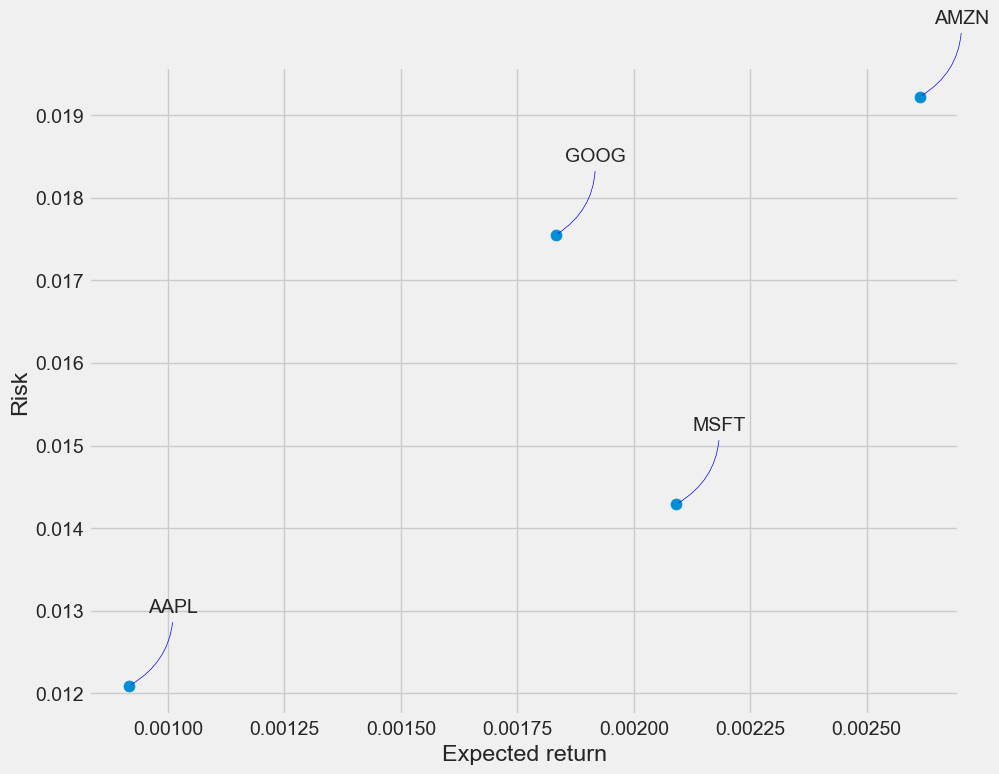

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Прогнозирование цены закрытия акций APPLE

In [18]:

df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# отображение данных
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433827,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751303,394024400
...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45074500
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400


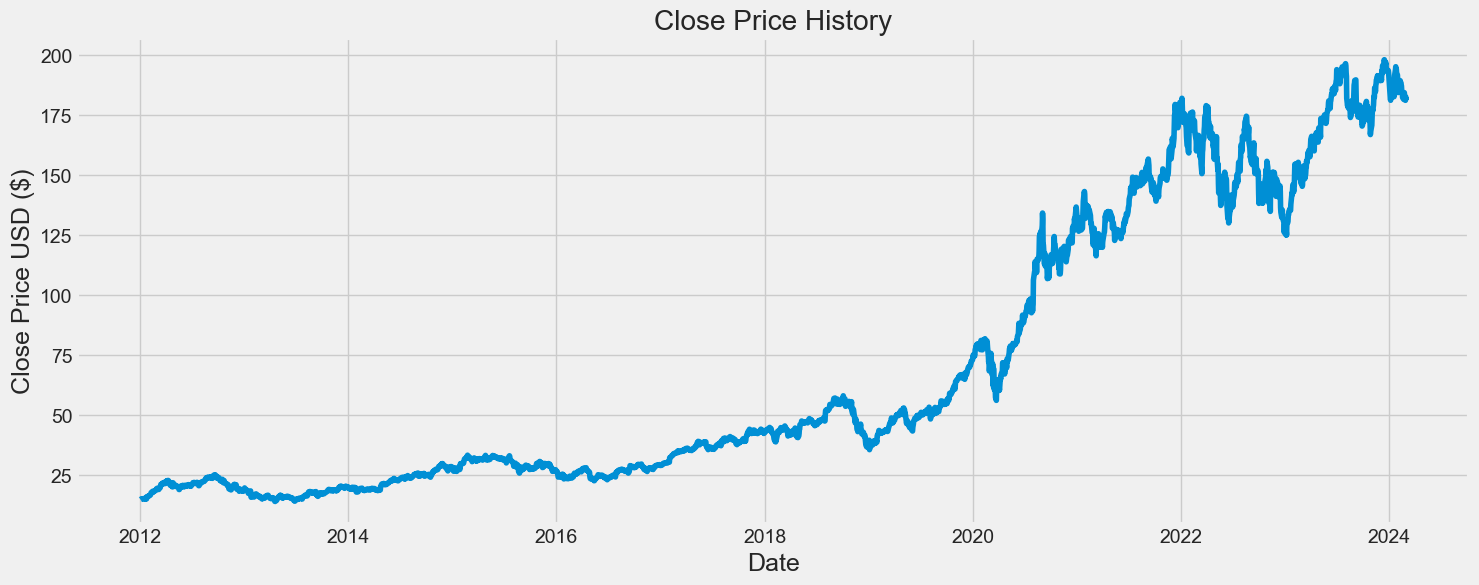

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
data = df.filter(['Close'])
# Преобразование DataFrame в массив numpy.
dataset = data.values
# Получение количества строк для обучения модели.
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2906

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.90796174],
       [0.91594382],
       [0.90823325]])

In [22]:
# создание набора данных для обучения
train_data = scaled_data[0:int(training_data_len), :]
# Разделение данных на наборы x_train и y_train.
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Преобразование x_train и y_train в массивы numpy.
x_train, y_train = np.array(x_train), np.array(y_train)

# Изменение формы данных
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import load_model

# Создание модели LSTM.
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Компиляция модели.
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(x_train, y_train, batch_size=1, epochs=30)

model.save('trained_model.h5')

Epoch 1/30
2846/2846 [==============================] - 37s 12ms/step - loss: 0.0011
Epoch 2/30
2846/2846 [==============================] - 37s 13ms/step - loss: 6.0151e-04
Epoch 3/30
2846/2846 [==============================] - 36s 13ms/step - loss: 4.8244e-04
Epoch 4/30
2846/2846 [==============================] - 36s 13ms/step - loss: 2.4800e-04
Epoch 5/30
2846/2846 [==============================] - 36s 13ms/step - loss: 3.2726e-04
Epoch 6/30
2846/2846 [==============================] - 35s 12ms/step - loss: 2.4317e-04
Epoch 7/30
2846/2846 [==============================] - 36s 13ms/step - loss: 2.4617e-04
Epoch 8/30
2846/2846 [==============================] - 34s 12ms/step - loss: 1.9696e-04
Epoch 9/30
2846/2846 [==============================] - 34s 12ms/step - loss: 2.3596e-04
Epoch 10/30
2846/2846 [==============================] - 35s 12ms/step - loss: 1.8840e-04
Epoch 11/30
2846/2846 [==============================] - 37s 13ms/step - loss: 1.9343e-04
Epoch 12/30
2846/2846 [

c:\Users\anyak\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 11ms/step


4.624712396272853

C:\Users\anyak\AppData\Local\Temp\ipykernel_7380\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


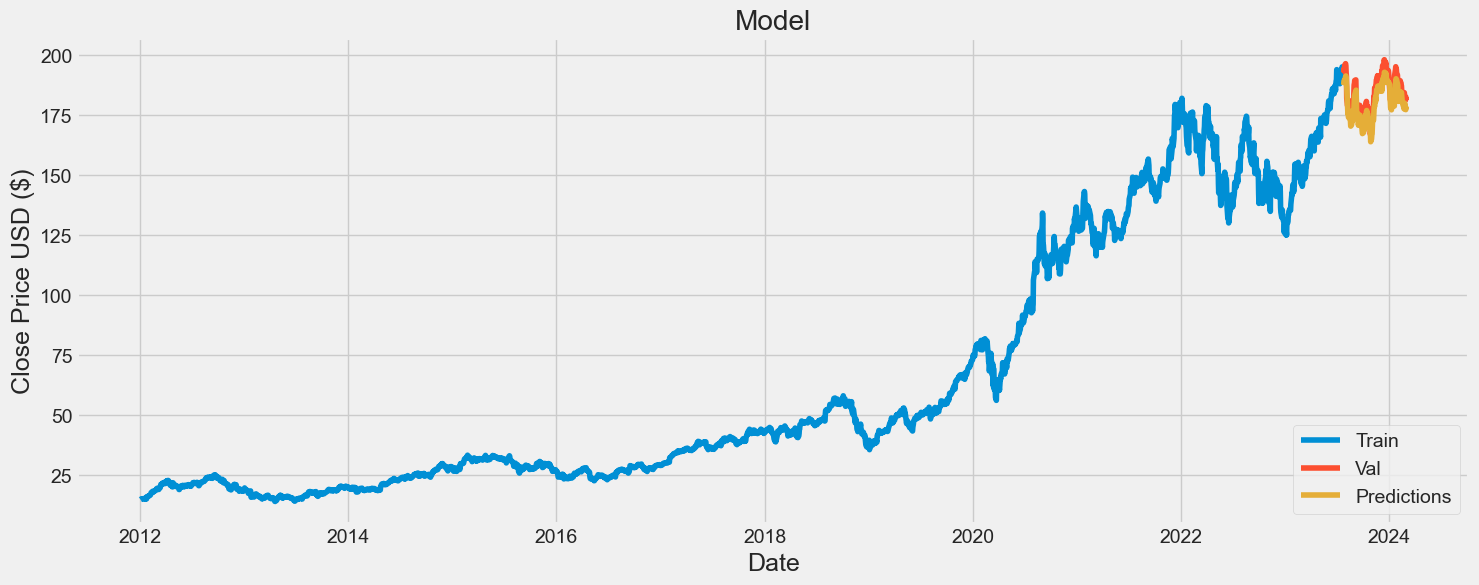

In [25]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

,Close,Predictions
Date,,
2023-07-24,192.750000,187.560516
2023-07-25,193.619995,188.240097
2023-07-26,194.500000,188.877243
2023-07-27,193.220001,189.637360
2023-07-28,195.830002,188.473740
...,...,...
2024-02-22,184.369995,178.238953
2024-02-23,182.520004,180.026855
2024-02-26,181.160004,178.308823
